Part 1

P1: Pi estimation 

In [ ]:
import random
# This function takes num_samples and 
# sample x, y independently from uniform distribution 
# then calculate ratio of coordinates inside unit circle to unit square to estimate Pi
def pi_estimator(num_samples):
  c = 0
  for i in range(num_samples):
    x = 2 * random.random()
    y = 2 * random.random()
    r = (x-1)**2 + (y-1)**2
    if r <= 1:
      c += 1
  return 4 * c/num_samples

In [ ]:
print(pi_estimator(100))
print(pi_estimator(1000))
print(pi_estimator(10000))

P2: Volume of a ball of a radius 2 estimation

In [ ]:
# This function takes num_samples and 
# sample x, y, z independently from uniform distribution 
# then calculate ratio of coordinates inside the ball to the cube to estimate the volume
def vol_est(num_samples):
  c = 0
  for i in range(num_samples):
    x = 4 * random.random()
    y = 4 * random.random()
    z = 4 * random.random()
    r = (x-2)**2 + (y-2)**2 + (z-2)**2
    if r <= 4:
      c += 1
  return 64 * c/num_samples


33.5201728


In [ ]:
print(vol_est(100))
print(vol_est(1000))
print(vol_est(10000))

Part 2: The game of craps

In one game of Craps, a player initially rolls two six-sided dice.\\

• If the sum of the faces of this initial roll is 7 or 11, the player wins. For example, I rolled
the two dice and I got on the first die 5 and on the second 2, then the sum is 7, so I win.

• If the sum of the faces of this initial roll is 2, 3, or 12, the player loses.

• With any other value for the sum of the faces of the initial roll, say X, the player
repeatedly rolls the dice until either a 7 or the value X of the initial roll appears. If the
value X of the initial roll appears before the 7, the player wins. However, if a 7 appears
before X, the player loses.

In [ ]:
# We simulate the game n times to determine
# the probability of winning or losing on the first roll, second roll, ..., up to the 10nth roll.
# Then we plot these probabilities
# This function simulate one game and return the game outcome and number of rolls
def playOneGame():
  a = random.randint(1, 6)
  b = random.randint(1, 6)
  if a + b == 7 or a + b == 11:
    return 1, 1
  if a + b == 2 or a + b == 3 or a + b == 12:
    return 0, 1
  c = 2
  while True:
    x = random.randint(1, 6)
    y = random.randint(1, 6)
    if x + y == a + b:
      return 1, c
    if x + y ==7:
      return 0, c
    c += 1

In [ ]:
# This function simulate n games and return number of wins and loses
def play(n):
  w = {}
  l = {}
  for i in range(n):
    r, num_rolls = playOneGame()
    if r == 1:
      if num_rolls not in w:
        w[num_rolls] = 1
      else:
         w[num_rolls] += 1
    else:
      if num_rolls not in l:
        l[num_rolls] = 1
      else:
         l[num_rolls] += 1
  return w, l

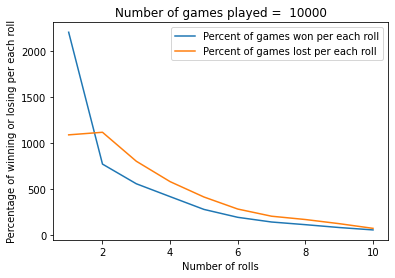

In [ ]:
import matplotlib.pyplot as plt
w, l = play(10000)
plt.plot(range(1, 11), [w[i] for i in range(1, 11)], label="Number of games won per each roll")
plt.plot(range(1, 11), [l[i] for i in range(1, 11)], label="Number of games lost per each roll")

plt.title("Number of games played =  10000")
plt.xlabel("Number of rolls")
plt.ylabel("Percentage of winning or losing per each roll")
plt.legend()
plt.show()

Assignment 3


Q4. Importance sampling of Beta(2,5) to calculate the distribution mean  

In [ ]:
from scipy.stats import beta, norm
import random
import numpy as np 

In [ ]:
a = 2
b = 5
N = 1000
samples = np.random.uniform(size=N)
proposal_q = 1
w = beta.pdf(samples, a, b) / proposal_q
approx_Ef = np.sum(w * samples)/N
true_Ef = a/(a+b)
ESS = np.power(np.sum(w), 2)/ np.sum(np.power(w, 2))
print('The approximation of the expectation of')
print('f(x) w.r.t the target is ', "{:.4f}".format(approx_Ef))
print('The true value of the expectation of')
print('f(x) w.r.t the target is ', "{:.4f}".format(true_Ef))
print('ESS = ', "{:.4f}".format(ESS))

The approximation of the expectation of
f(x) w.r.t the target is  0.2773
The true value of the expectation of
f(x) w.r.t the target is  0.2857
ESS =  545.5605


Q5.1. Importance sampling of p(x) = 4 e^(-3 x^2) to calculate the expectation of of f(x) = e^-x wrt p(x)

In [ ]:
def IS1(N):
  samples = np.random.normal(loc=1, scale=2, size=N)
  proposal_q = norm.pdf(samples, 1, 2)
  w = 4 * np.exp(-3 * np.power(samples, 2)) / proposal_q
  approx_Ef = np.sum(w * np.exp(-samples))/N
  ESS = np.power(np.sum(w), 2)/ np.sum(np.power(w, 2))
  print('The approximation of the expectation of ', N, ' samples')
  print('f(x) w.r.t the target is ', "{:.4f}".format(approx_Ef))
  print('ESS of ' , N, ' samples = ', "{:.4f}".format(ESS))

In [ ]:
IS1(100)
IS1(10000)
IS1(1000000)
print('The true value of the expectation of')
print('f(x) w.r.t the target is ', "{:.4f}".format(4.44903))

The approximation of the expectation of  100  samples
f(x) w.r.t the target is  4.7642
ESS of  100  samples =  28.2140
The approximation of the expectation of  10000  samples
f(x) w.r.t the target is  4.5429
ESS of  10000  samples =  2553.5133
The approximation of the expectation of  1000000  samples
f(x) w.r.t the target is  4.4358
ESS of  1000000  samples =  250793.0214
The true value of the expectation of
f(x) w.r.t the target is  4.4490


Q5.2. Importance sampling of p(x) = 4 e^(-3 x^2) to calculate the expectation of of f(x) = e^(3 x) wrt p(x)

In [ ]:
def IS2(N):
  samples = np.random.normal(loc=1, scale=2, size=N)
  proposal_q = norm.pdf(samples, 1, 2)
  w = 4 * np.exp(-3 * np.power(samples, 2)) / proposal_q
  approx_Ef = np.sum(w * np.exp(3 * samples))/N
  ESS = np.power(np.sum(w), 2)/ np.sum(np.power(w, 2))
  print('The approximation of the expectation of ', N, ' samples')
  print('f(x) w.r.t the target is ', "{:.4f}".format(approx_Ef))
  print('ESS of ' , N, ' samples = ', "{:.4f}".format(ESS))

In [ ]:
IS2(100)
IS2(10000)
IS2(1000000)
print('The true value of the expectation of')
print('f(x) w.r.t the target is ', "{:.4f}".format(8.66553))

The approximation of the expectation of  100  samples
f(x) w.r.t the target is  12.4894
ESS of  100  samples =  32.5110
The approximation of the expectation of  10000  samples
f(x) w.r.t the target is  9.1308
ESS of  10000  samples =  2616.0483
The approximation of the expectation of  1000000  samples
f(x) w.r.t the target is  8.6793
ESS of  1000000  samples =  251928.4284
The true value of the expectation of
f(x) w.r.t the target is  8.6655


Rejection sampling of Beta(4, 3)

In [ ]:
samples = []
while len(samples) < 100000:
   y = np.random.uniform()
   u = np.random.uniform()
   if u < beta.pdf(y, 1.5, 3)/2:
     samples.append(y)


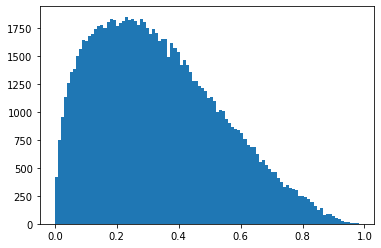

In [ ]:
import matplotlib.pyplot as plt
plt.hist(samples, bins=100)
plt.show()

Assignment 5


P3.2.

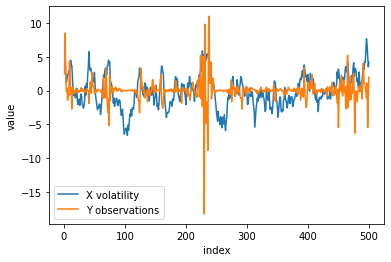

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = []
Y = []
s = np.random.normal()
X.append(s * np.sqrt(1/(1-0.91**2)))
for i in range(500):
  s = np.random.normal()
  X.append(0.91 * X[-1] + s)
  s = np.random.normal()
  Y.append(0.5 * np.exp(X[-1]/2) * s)
X.pop(0)

plt.plot(range(1, 501), X, label="X volatility")
plt.plot(range(1, 501), Y, label="Y observations")
plt.xlabel("index")
plt.ylabel("value")
plt.legend()
plt.show()

Assignment 6

P2: Kalman filter mean plot

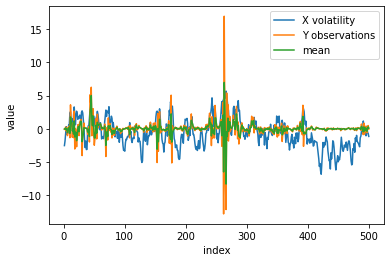

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = []
Y = []
E = []
V = []
s = np.random.normal()
X.append(s * np.sqrt(1/(1-0.91**2)))
for i in range(500):
  s = np.random.normal()
  X.append(0.91 * X[-1] + s)
  s = np.random.normal()
  Y.append(0.5 * np.exp(X[-1]/2) * s)
  if i == 0:
    E.append(0.7 * Y[0]/(0.7 + 0.9))
    V.append(0.7 * 0.9/(0.7 + 0.9))
  else:
    beta = (1/0.9) + 1/(0.7 + V[-1])
    E.append((1/beta)*((Y[-1]/0.9) + E[-1]/(0.7 + V[-1])))
    V.append(1/beta)
X.pop(0)

plt.plot(range(1, 501), X, label="X volatility")
plt.plot(range(1, 501), Y, label="Y observations")
plt.plot(range(1, 501), E, label="mean")
plt.xlabel("index")
plt.ylabel("value")
plt.legend()
plt.show()